In [1]:
library(tidyverse)
library(car)
library(leaps)

options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
ames_housing <- read.table("https://raw.githubusercontent.com/AllenCheng5186/STAT306-G14-Group-Project/refs/heads/main/data/ames-housing.csv", sep = ",", header=T)

In [3]:
names(ames_housing)

[1] "Order"           "PID"             "MS.SubClass"     "MS.Zoning"      
 [5] "Lot.Frontage"    "Lot.Area"        "Street"          "Alley"          
 [9] "Lot.Shape"       "Land.Contour"    "Utilities"       "Lot.Config"     
[13] "Land.Slope"      "Neighborhood"    "Condition.1"     "Condition.2"    
[17] "Bldg.Type"       "House.Style"     "Overall.Qual"    "Overall.Cond"   
[21] "Year.Built"      "Year.Remod.Add"  "Roof.Style"      "Roof.Matl"      
[25] "Exterior.1st"    "Exterior.2nd"    "Mas.Vnr.Type"    "Mas.Vnr.Area"   
[29] "Exter.Qual"      "Exter.Cond"      "Foundation"      "Bsmt.Qual"      
[33] "Bsmt.Cond"       "Bsmt.Exposure"   "BsmtFin.Type.1"  "BsmtFin.SF.1"   
[37] "BsmtFin.Type.2"  "BsmtFin.SF.2"    "Bsmt.Unf.SF"     "Total.Bsmt.SF"  
[41] "Heating"         "Heating.QC"      "Central.Air"     "Electrical"     
[45] "X1st.Flr.SF"     "X2nd.Flr.SF"     "Low.Qual.Fin.SF" "Gr.Liv.Area"    
[49] "Bsmt.Full.Bath"  "Bsmt.Half.Bath"  "Full.Bath"       "Half.Bath"      
[53] "Bedroom.AbvGr"   "Kitchen.AbvGr"   "Kitchen.Qual"    "TotRms.AbvGrd"  
[57] "Functional"      "Fireplaces"      "Fireplace.Qu"    "Garage.Type"    
[61] "Garage.Yr.Blt"   "Garage.Finish"   "Garage.Cars"     "Garage.Area"    
[65] "Garage.Qual"     "Garage.Cond"     "Paved.Drive"     "Wood.Deck.SF"   
[69] "Open.Porch.SF"   "Enclosed.Porch"  "X3Ssn.Porch"     "Screen.Porch"   
[73] "Pool.Area"       "Pool.QC"         "Fence"           "Misc.Feature"   
[77] "Misc.Val"        "Mo.Sold"         "Yr.Sold"         "Sale.Type"      
[81] "Sale.Condition"  "SalePrice"

In [4]:
house <- ames_housing %>%
    select("SalePrice", "MS.Zoning", "Lot.Area", "Lot.Shape", "Land.Contour",
        "Utilities", "Overall.Qual", "Overall.Cond", "Year.Built", "Foundation",
        "Heating", "Central.Air", "Gr.Liv.Area", "Bedroom.AbvGr", "Kitchen.AbvGr",
        "TotRms.AbvGrd", "Garage.Type", "Garage.Area", "Pool.Area", "Fence",
        "Yr.Sold"
    )

house[sapply(house, is.character)] <- lapply(house[sapply(house, is.character)], as.factor)
house$Fence <- factor(ifelse(is.na(house$Fence), 0, 1))

house

SalePrice,MS.Zoning,Lot.Area,Lot.Shape,Land.Contour,Utilities,Overall.Qual,Overall.Cond,Year.Built,Foundation,⋯,Central.Air,Gr.Liv.Area,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Garage.Type,Garage.Area,Pool.Area,Fence,Yr.Sold
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>
215000,RL,31770,IR1,Lvl,AllPub,6,5,1960,CBlock,⋯,Y,1656,3,1,7,Attchd,528,0,0,2010
105000,RH,11622,Reg,Lvl,AllPub,5,6,1961,CBlock,⋯,Y,896,2,1,5,Attchd,730,0,1,2010
172000,RL,14267,IR1,Lvl,AllPub,6,6,1958,CBlock,⋯,Y,1329,3,1,6,Attchd,312,0,0,2010
244000,RL,11160,Reg,Lvl,AllPub,7,5,1968,CBlock,⋯,Y,2110,3,1,8,Attchd,522,0,0,2010
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
131000,RL,8885,IR1,Low,AllPub,5,5,1983,CBlock,⋯,Y,902,2,1,5,Attchd,484,0,1,2006
132000,RL,10441,Reg,Lvl,AllPub,5,5,1992,PConc,⋯,Y,970,3,1,6,NA,0,0,1,2006
170000,RL,10010,Reg,Lvl,AllPub,5,5,1974,CBlock,⋯,Y,1389,2,1,6,Attchd,418,0,0,2006
188000,RL,9627,Reg,Lvl,AllPub,7,5,1993,PConc,⋯,Y,2000,3,1,9,Attchd,650,0,0,2006


In [5]:
str(house)

'data.frame':	2930 obs. of  21 variables:
 $ SalePrice    : int  215000 105000 172000 244000 189900 195500 213500 191500 236500 189000 ...
 $ MS.Zoning    : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ Lot.Area     : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Lot.Shape    : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ Land.Contour : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities    : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Overall.Qual : int  6 5 6 7 5 6 8 8 8 7 ...
 $ Overall.Cond : int  5 6 6 5 5 6 5 5 5 5 ...
 $ Year.Built   : int  1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 ...
 $ Foundation   : Factor w/ 6 levels "BrkTil","CBlock",..: 2 2 2 2 3 3 3 3 3 3 ...
 $ Heating      : Factor w/ 6 levels "Floor","GasA",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Central.Air  : Factor w/ 2 levels "N","Y": 2 2 2 2 2 2 2 2 2 2 ...
 $ Gr.Liv.Area  : int  1656 896 1329 2110

In [6]:
linear_reg = lm(SalePrice~.,data = house)
summary(linear_reg)


Call:
lm(formula = SalePrice ~ ., data = house)

Residuals:
    Min      1Q  Median      3Q     Max 
-429849  -18900   -1594   15977  276929 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.648e+04  1.044e+06   0.016 0.987405    
MS.ZoningC (all)   -2.546e+03  2.826e+04  -0.090 0.928211    
MS.ZoningFV        -5.317e+02  2.688e+04  -0.020 0.984220    
MS.ZoningI (all)    3.662e+03  3.950e+04   0.093 0.926144    
MS.ZoningRH        -4.128e+03  2.777e+04  -0.149 0.881855    
MS.ZoningRL         1.020e+04  2.663e+04   0.383 0.701658    
MS.ZoningRM        -1.421e+03  2.675e+04  -0.053 0.957640    
Lot.Area            8.042e-01  1.028e-01   7.822 7.35e-15 ***
Lot.ShapeIR2        1.438e+03  4.358e+03   0.330 0.741356    
Lot.ShapeIR3       -3.439e+04  9.581e+03  -3.590 0.000337 ***
Lot.ShapeReg       -8.242e+02  1.568e+03  -0.526 0.599232    
Land.ContourHLS     4.258e+04  4.954e+03   8.594  < 2e-16 ***
Land.ContourLow     1.972e+04  6.269

In [7]:
predictors <- setdiff(names(house), "SalePrice")

# Initialize with the null model (intercept only)
current_formula <- as.formula("SalePrice ~ 1")
current_model <- lm(current_formula, data = house)
aic_values <- c(AIC(current_model))
num_predictors <- 0
selected <- c()

# Forward selection: iteratively add one predictor that gives the lowest AIC.
for(i in 1:length(predictors)) {
  remaining <- setdiff(predictors, selected)
  
  aic_candidates <- sapply(remaining, function(var) {
    new_formula <- as.formula(paste("SalePrice ~", paste(c(selected, var), collapse = " + ")))
    AIC(lm(new_formula, data = house))
  })
  
  best_var <- names(which.min(aic_candidates))
  selected <- c(selected, best_var)
  
  current_formula <- as.formula(paste("SalePrice ~", paste(selected, collapse = " + ")))
  current_model <- lm(current_formula, data = house)
  
  aic_values <- c(aic_values, AIC(current_model))
  num_predictors <- c(num_predictors, length(selected))
}

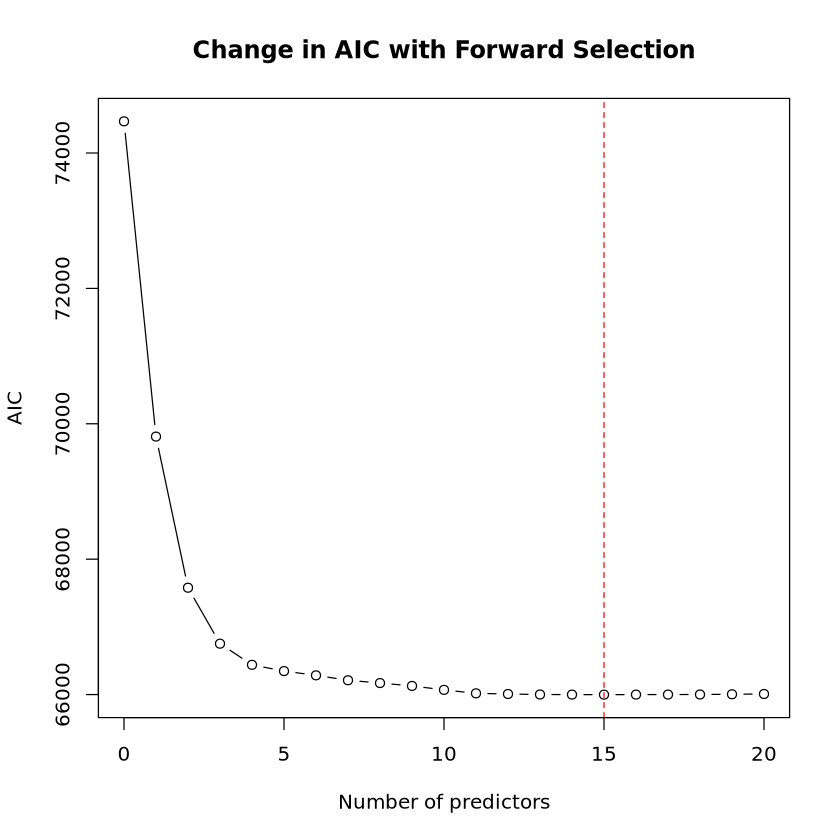

In [8]:
# Plot AIC vs. number of predictors
plot(0:length(predictors), aic_values, type = "b",
     xlab = "Number of predictors", ylab = "AIC",
     main = "Change in AIC with Forward Selection")

min_index <- which.min(aic_values)
min_num_pred <- num_predictors[min_index]
abline(v = min_num_pred, col = "red", lty = 2)

In [9]:
s = regsubsets(SalePrice~., data=house, method="exhaustive")
ss = summary(s)

In [10]:
ss

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = house, method = "exhaustive")
42 Variables  (and intercept)
                   Forced in Forced out
MS.ZoningC (all)       FALSE      FALSE
MS.ZoningFV            FALSE      FALSE
MS.ZoningI (all)       FALSE      FALSE
MS.ZoningRH            FALSE      FALSE
MS.ZoningRL            FALSE      FALSE
MS.ZoningRM            FALSE      FALSE
Lot.Area               FALSE      FALSE
Lot.ShapeIR2           FALSE      FALSE
Lot.ShapeIR3           FALSE      FALSE
Lot.ShapeReg           FALSE      FALSE
Land.ContourHLS        FALSE      FALSE
Land.ContourLow        FALSE      FALSE
Land.ContourLvl        FALSE      FALSE
UtilitiesNoSeWa        FALSE      FALSE
UtilitiesNoSewr        FALSE      FALSE
Overall.Qual           FALSE      FALSE
Overall.Cond           FALSE      FALSE
Year.Built             FALSE      FALSE
FoundationCBlock       FALSE      FALSE
FoundationPConc        FALSE      FALSE
FoundationSlab         FALSE 